In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
#Cheking out few of the data sets
names = ['VENDOR','MODEL_NAME','MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP' ];
data = pd.read_csv('H:\\dataset\\Computer Hardware\\machine.data',names=names)
data.head()

,VENDOR,MODEL_NAME,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
data

,VENDOR,MODEL_NAME,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
197,sperry,80/8,124,1000,8000,0,1,8,42,37
198,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
199,sratus,32,125,2000,8000,0,2,14,52,41
200,wang,vs-100,480,512,8000,32,0,0,67,47


### Feature Selection

In [4]:
#Let’s select only the numerical fields for model fitting.
 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VENDOR      202 non-null    object
 1   MODEL_NAME  202 non-null    object
 2   MYCT        202 non-null    int64 
 3   MMIN        202 non-null    int64 
 4   MMAX        202 non-null    int64 
 5   CACH        202 non-null    int64 
 6   CHMIN       202 non-null    int64 
 7   CHMAX       202 non-null    int64 
 8   PRP         202 non-null    int64 
 9   ERP         202 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 15.9+ KB


In [5]:
#We can see that barring first two variables rest of them are numeric in nature. Let’s only pick the numeric fields.
categorical_ = data.iloc[:,:2]
numerical_ = data.iloc[:,2:]
numerical_.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [6]:
#Select the predictor and target variables

X = numerical_.iloc[:,:-1]
y = numerical_.iloc[:,-1]

### Train test split :



In [7]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10,
random_state=42,
shuffle=True)

### Normalize the data :

 


In [8]:
#Before we do the fitting , let’s normalize the data so that the data is centered around the 
#mean and has unit standard deviation.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_training_set)

# Apply transform to both the training set and the test set.
x_training_set = scaler.transform(x_training_set)
x_test_set = scaler.transform(x_test_set)


In [9]:
y_training_set = y_training_set.values.reshape(-1, 1)
y_test_set  = y_test_set.values.reshape(-1, 1)
y_scaler = StandardScaler()
# Fit on training set only.
y_scaler.fit(y_training_set)
# Apply transform to both the training set and the test set.
y_training_set = y_scaler.transform(y_training_set)
y_test_set = y_scaler.transform(y_test_set)


In [10]:
model = linear_model.LinearRegression()
model.fit(x_training_set,y_training_set)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print( 'coefficient of determination R^2 of the prediction.:',model_score)
y_predicted = model.predict(x_test_set)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))


coefficient of determination R^2 of the prediction.: 0.9626144785814627
Mean squared error: 0.04
Test Variance score: 0.68


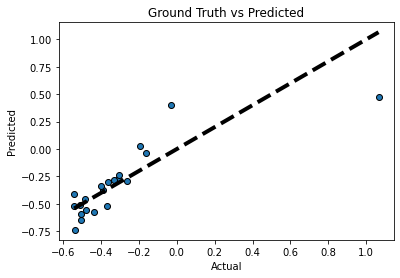

In [12]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))

ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()